<!--NOTEBOOK_HEADER-->
*This notebook is adapted from course material from [CBE20255](https://jckantor.github.io/CBE20255)
by Jeffrey Kantor (jeff at nd.edu); the original content is available [on Github](https://github.com/jckantor/CBE20255.git).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

# Binary distillation with McCabe-Thiele method

## Problem Statement

*Adapted from Example 18.2, McCabe, Smith, and Harriott, "Unit Operations of Chemical Engineering," 5th ed., 1993.* 

A continuous fractionating column is to be designed to separate 30,000 kg/h of a mixture of 40% benzene and 60% toluene into an overhead product containing 97% benzene and a bottom product containing 98% toluene (by weight). A reflux ratio of 3.5 mol to 1 mol of product is to be used. The molal latent heats of benzene and toluene are 7,360 and 7,960 cal/g mol, respectively.  Benzene and toluene form an ideal system with a relative volatility of about 2.5. The feed has a boiling point of 95 &deg;C at a pressure of 1 atm. 

We would like to determine the number of ideal plates and the position of the feed plate if the feed is liquid and at its boiling point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import exp as exp
from math import pow as pow
%matplotlib inline

## Production Rate

The molecular weight of benzene is 78 and that of toluene is 92.

It is sometimes convenient to store values in dictionaries when dealing with multiple variables of the same type. (Another approach is to create a class, but that is beyond of the scope of today's short lesson.)

In [2]:
mw = dict()
mw['benzene'] = 78
mw['toluene'] = 92 

In [3]:
mw

{'benzene': 78, 'toluene': 92}

In [4]:
type(mw)

dict

The 'dict.keys()' method returns a `dict_keys` object containing a list of the dictionary's keys.

In [5]:
mw.keys()

dict_keys(['benzene', 'toluene'])

This object can be iterated over in a for-loop.

In [6]:
for key in mw.keys():
    print('mw[\'{:8s}\']: {:4.2f}'.format(key, mw[key]))

mw['benzene ']: 78.00
mw['toluene ']: 92.00


A simple mass balance can be used to compute the feed, overhead, and bottoms in mole fraction of benzene ($x_F$, $x_D$, and $x_B$, respectively).

In [7]:
A = 'benzene'
B = 'toluene'

xF = (40/mw[A] / (40/mw[A] + 60/mw[B]))
xD = (97/mw[A] / (97/mw[A] +  3/mw[B]))
xB = ( 2/mw[A] / ( 2/mw[A] + 98/mw[B]))

print('xF: {:.2f}'.format(xF))
print('xD: {:.2f}'.format(xD))
print('xB: {:.2f}'.format(xB))

xF: 0.44
xD: 0.97
xB: 0.02


### Saturation Pressure Data

The saturation (vapor) pressure of benzene and toluene can be computed by

\begin{align}
\ln \frac{P_{sat}}{P_c} &= \frac{Ax + Bx^{1.5} + Cx^3 + Dx^6}{1-x}\\
x &= 1-\frac{T}{T_c}
\end{align}

The constants for these equations come from Appendix A of Reid, Prausnitz, ane Poling with units of temperature in Kelvin and pressure in bar. 

We will store the functions in dictionaries where the key is an identifier for the chemical specie.

In [8]:
x_Psat = dict()
x_Psat['benzene'] = lambda T: 1 - T/562.2
x_Psat['toluene'] = lambda T: 1 - T/591.8

Psat = dict()
Psat['benzene'] = lambda T: 48.9 * exp(( -6.98273 * x_Psat['benzene'](T) +
                                         1.33213 * pow(x_Psat['benzene'](T), 3/2) +
                                         -2.62863 * pow(x_Psat['benzene'](T), 3) +
                                         -3.33399 * pow(x_Psat['benzene'](T), 6) )/ (1-x_Psat['benzene'](T)))
Psat['toluene'] = lambda T: 41.0 * exp(( -7.28607 * x_Psat['toluene'](T) +
                                         1.38091 * pow(x_Psat['toluene'](T), 3/2) +
                                         -2.83433 * pow(x_Psat['toluene'](T), 3) +
                                         -2.79168 * pow(x_Psat['toluene'](T), 6) )/ (1-x_Psat['toluene'](T)))

### Saturation Temperatures

We can solve the $P_{sat}$ equation for temperature to compute the saturation temperatures (boiling points) for benzene and toluene at the operating pressure (1 atm = 1.01325 bar). This will determine the lower and upper bound on temperatures for the equilibrium-line.

In [9]:
Tsat = dict()
for s in Psat.keys():
    Tsat[s] = lambda P, s=s: fsolve(lambda T: Psat[s](T)-P, 400)[0]

In [10]:
P = 1.01325 # pressure in bar

T_A = Tsat[A](P)
T_B = Tsat[B](P)

print("{:12s}  {:.1f} K".format(A, T_A))
print("{:12s}  {:.1f} K".format(B, T_B))

benzene       353.3 K
toluene       383.9 K


These values are very close to the actual boiling points for benzene and toluene of 353.2 K and 383.8 K, respectively.  

*Of course, since we are operating at 1 atm, we could have just looked these values up in the first place, but the above approach is necessary if we are operating at some other pressure!*

Now, we create an array of temperatures for our plots.

We will use the `numpy.linspace()` method to generate the sequence of numbers between $T_A$ and $T_B$.

In [11]:
T = np.linspace(T_A, T_B)
T

array([353.31855602, 353.94239213, 354.56622824, 355.19006435,
       355.81390045, 356.43773656, 357.06157267, 357.68540878,
       358.30924489, 358.93308099, 359.5569171 , 360.18075321,
       360.80458932, 361.42842543, 362.05226154, 362.67609764,
       363.29993375, 363.92376986, 364.54760597, 365.17144208,
       365.79527818, 366.41911429, 367.0429504 , 367.66678651,
       368.29062262, 368.91445872, 369.53829483, 370.16213094,
       370.78596705, 371.40980316, 372.03363927, 372.65747537,
       373.28131148, 373.90514759, 374.5289837 , 375.15281981,
       375.77665591, 376.40049202, 377.02432813, 377.64816424,
       378.27200035, 378.89583645, 379.51967256, 380.14350867,
       380.76734478, 381.39118089, 382.015017  , 382.6388531 ,
       383.26268921, 383.88652532])

## Equilibrium Diagram

For the McCabe-Thiele graphical method, we first need equations for the equilibrium diagram. Our x-coordinate will be the liquid mole fraction of benzene, and our y-coordinate is the vapor mole fraction of toluene.

\begin{align}
x_{benzene} &= \frac{P-P_{sat, toluene}}{P_{sat, benzene} - P_{sat, toluene}} \\
y_{toluene} &= \frac{x_{benzene} P_{sat, benzene}}{P}
\end{align}

In [12]:
x = lambda T: (P-Psat[B](T))/(Psat[A](T)-Psat[B](T))
y = lambda T: x(T)*Psat[A](T)/P

We can now plot the equilibrium curve, $x(T)$ versus $y(T)$. It's also useful to plot a diagonal line ($x=y$).

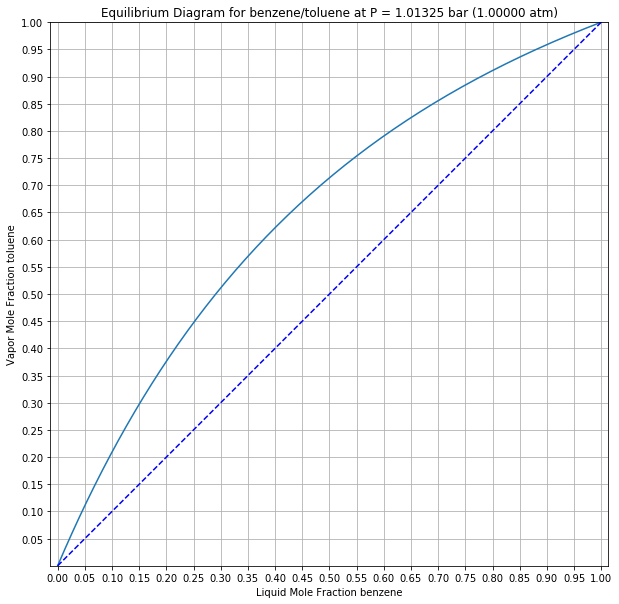

In [13]:
plt.figure(figsize=(10,10))
plt.plot([x(T) for T in T],[y(T) for T in T])

plt.plot([0,1],[0,1],'b--')
plt.axis('equal')
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(0.05,1.0,20));

plt.title('Equilibrium Diagram for {:s}/{:s} at P = {:.5f} bar ({:.5f} atm)'.format(A,B,P,P/1.01325))
plt.xlabel('Liquid Mole Fraction {:s}'.format(A))
plt.ylabel('Vapor Mole Fraction {:s}'.format(B))

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

We will then add verticals at $x_D$, $x_F$, and $x_B$ from the x-axis to the diagonal of the diagram.

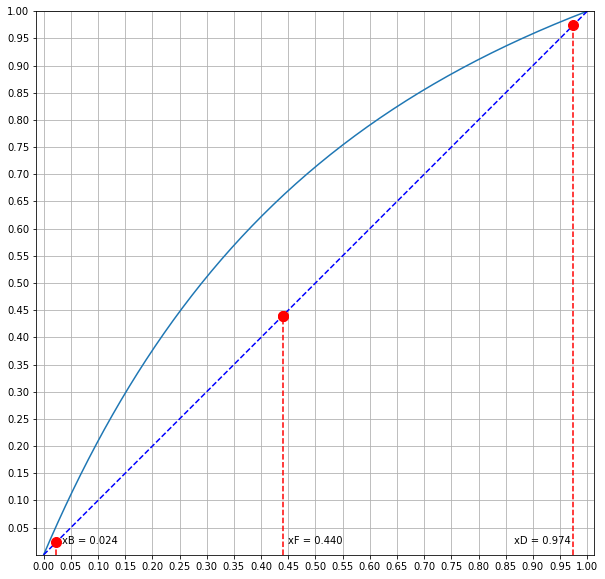

In [14]:
plt.figure(figsize=(10,10))
plt.plot([x(T) for T in T],[y(T) for T in T])

plt.plot([0,1],[0,1],'b--')
plt.axis('equal')
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(0.05,1.0,20))

### BEGIN NEW CODE ###

plt.plot([xD,xD], [0,xD], 'r--')
plt.plot(xD,xD, 'ro', ms=10)
plt.text(xD-0.11, 0.02, 'xD = {:0.3f}'.format(float(xD)))

plt.plot([xF,xF], [0,xF], 'r--')
plt.plot([xF,xF], [xF,xF], 'ro', ms=10)
plt.text(xF+0.01, 0.02, 'xF = {:0.3f}'.format(float(xF)))

plt.plot([xB,xB], [0,xB], 'r--')
plt.plot(xB,xB, 'ro', ms=10)
plt.text(xB+0.01, 0.02, 'xB = {:0.3f}'.format(float(xB)))

### END NEW CODE ###

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

## Feed line

The second step is to extend the feed line to the equilibrium curve. First, we solve for the temperature at which the vertical feed line intercepts the equilibrium curve. We'll use `fsolve` to find the zero of $x(T) - x_F$, using the mean of the T array as a guess. We could also use $(T_A + T_B)/2$. 

(We imported `fsolve` with the command `from scipy.optimize import fsolve` above.)

Then, we will substitute this temperature into our y-equation to get $y_F$.

In [15]:
Tbub = fsolve(lambda T:x(T) - xF, np.mean(T))
yF = y(Tbub[0])

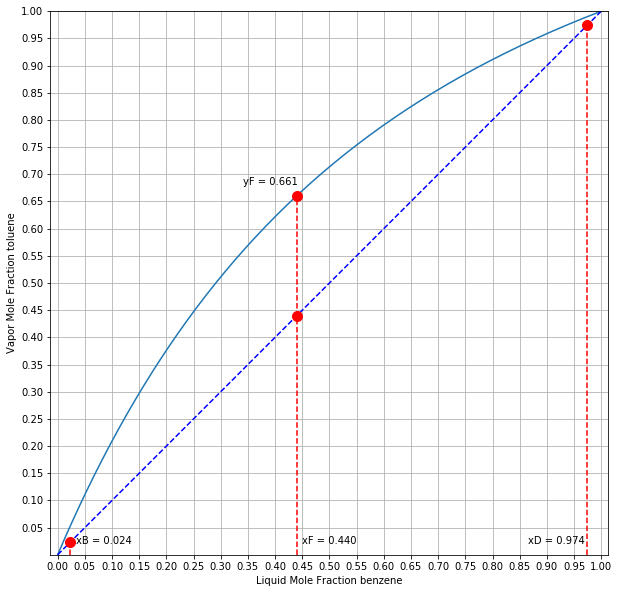

In [16]:
plt.figure(figsize=(10,10))
plt.plot([x(T) for T in T],[y(T) for T in T])

plt.plot([0,1],[0,1],'b--')
plt.axis('equal')
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(0.05,1.0,20))

plt.xlabel('Liquid Mole Fraction {:s}'.format(A))
plt.ylabel('Vapor Mole Fraction {:s}'.format(B))

plt.plot([xD,xD], [0,xD], 'r--')
plt.plot(xD,xD, 'ro', ms=10)
plt.text(xD-0.11, 0.02, 'xD = {:0.3f}'.format(float(xD)))

plt.plot([xF,xF,xF],[0,xF,yF],'r--')  ### MODIFIED LINE ###
plt.plot([xF,xF],[xF,yF],'ro',ms=10)  ### NEW LINE ###
plt.text(xF+0.01,0.02,'xF = {:0.3f}'.format(float(xF)))  
plt.text(xF-0.1,yF+0.02,'yF = {:0.3f}'.format(float(yF))) ### NEW LINE ###

plt.plot([xB,xB], [0,xB], 'r--')
plt.plot(xB,xB, 'ro', ms=10)
plt.text(xB+0.01, 0.02, 'xB = {:0.3f}'.format(float(xB)))

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

## Operating lines

Next, we plot the operating lines.  The operating line for the rectifying section is

\begin{equation}
y_{n+1} = \frac{R_D}{R_D+1} x_n + \frac{x_D}{R_D + 1}
\end{equation}

Therefore, the intercept of the rectifying line on the y-axis is given by $x_D/(R_D + 1)$, where $R_D$ is the reflux ratio (3.5 for our problem).  The y-value of the intercept of the rectifying line and the stripping line, $z_F$, at $x_F$ can then be calculated. 

In [17]:
R_D = 3.5
R_slope = R_D/(R_D+1)
R_intercept = xD/(R_D + 1)
print('Rectifying line intercept: {:0.3f}'.format(R_intercept))
zF = R_slope * xF + R_intercept
print('Rectifying and stripping line intercept: {:0.3f}'.format(zF))

Rectifying line intercept: 0.217
Rectifying and stripping line intercept: 0.559


The slope of the stripping line is:

\begin{equation}
S_{slope} = \frac{z_F-x_B}{x_F-x_B}
\end{equation}

In [18]:
S_slope = (zF-xB)/(xF-xB)
S = 1/(S_slope-1)
print('Stripping factor: {:0.3f}'.format(S))

Stripping factor: 3.510


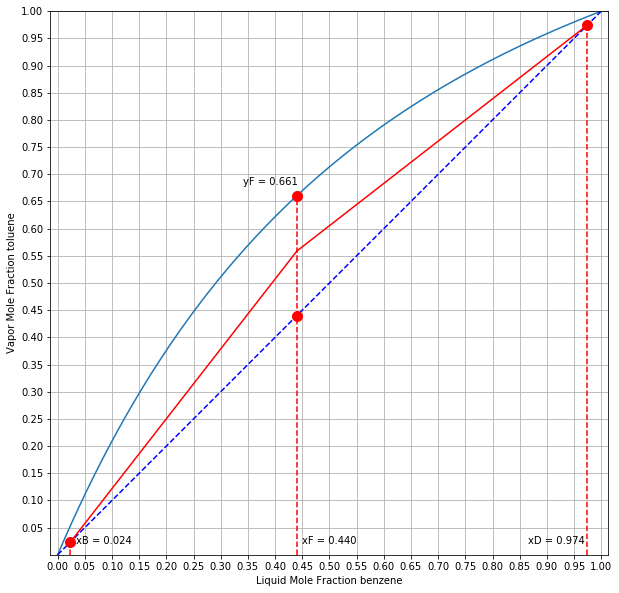

In [19]:
plt.figure(figsize=(10,10))
plt.plot([x(T) for T in T],[y(T) for T in T])
plt.plot([0,1],[0,1],'b--')
plt.axis('equal')
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(0.05,1.0,20))

plt.xlabel('Liquid Mole Fraction {:s}'.format(A))
plt.ylabel('Vapor Mole Fraction {:s}'.format(B))

plt.plot([xD,xD], [0,xD], 'r--')
plt.plot(xD,xD, 'ro', ms=10)
plt.text(xD-0.11, 0.02, 'xD = {:0.3f}'.format(float(xD)))

plt.plot([xF,xF,xF],[0,xF,yF],'r--')
plt.plot([xF,xF],[xF,yF],'ro',ms=10)
plt.text(xF+0.01,0.02,'xF = {:0.3f}'.format(float(xF)))
plt.text(xF-0.1,yF+0.02,'yF = {:0.3f}'.format(float(yF)));

plt.plot([xB,xB], [0,xB], 'r--')
plt.plot(xB,xB, 'ro', ms=10)
plt.text(xB+0.01, 0.02, 'xB = {:0.3f}'.format(float(xB)))

### BEGIN NEW CODE ###

plt.plot([xD,xF],[xD,zF],'r-')
plt.plot([xB,xF],[xB,zF],'r-');

### END NEW CODE ###

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

## Rectangular steps = number of ideal plates

The next step is to draw the rectangular steps between the two operating lines and the equilibrium curve to determine the number of ideal plates. This is done with a while loop.

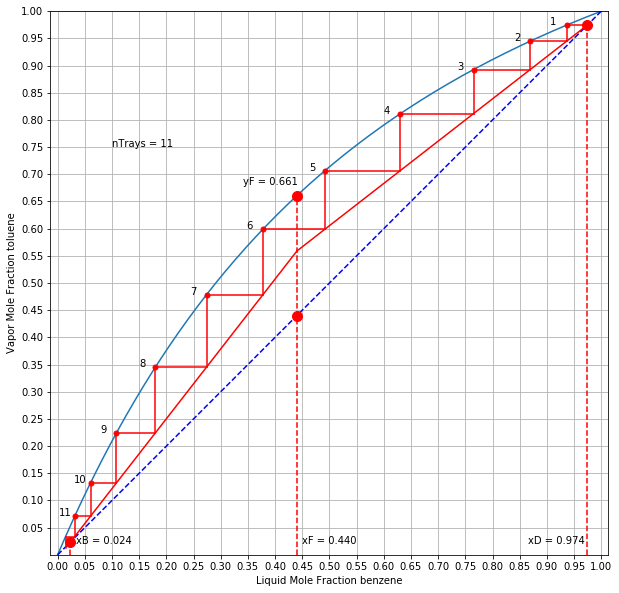

In [20]:
plt.figure(figsize=(10,10))
plt.plot([x(T) for T in T],[y(T) for T in T])
plt.plot([0,1],[0,1],'b--')
plt.axis('equal')
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(0.05,1.0,20))

plt.xlabel('Liquid Mole Fraction {:s}'.format(A))
plt.ylabel('Vapor Mole Fraction {:s}'.format(B))

plt.plot([xD,xD], [0,xD], 'r--')
plt.plot(xD,xD, 'ro', ms=10)
plt.text(xD-0.11, 0.02, 'xD = {:0.3f}'.format(float(xD)))

plt.plot([xF,xF,xF],[0,xF,yF],'r--')
plt.plot([xF,xF],[xF,yF],'ro',ms=10)
plt.text(xF+0.01,0.02,'xF = {:0.3f}'.format(float(xF)))
plt.text(xF-0.1,yF+0.02,'yF = {:0.3f}'.format(float(yF)));

plt.plot([xB,xB], [0,xB], 'r--')
plt.plot(xB,xB, 'ro', ms=10)
plt.text(xB+0.01, 0.02, 'xB = {:0.3f}'.format(float(xB)))


plt.plot([xD,xF],[xD,zF],'r-')
plt.plot([xB,xF],[xB,zF],'r-')

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

### BEGIN NEW CODE ###

xP = xD
yP = xD

nTray = 0

while xP > xB:
    nTray += 1

    # store (xP, yP) in (xQ, yQ)
    xQ = xP
    yQ = yP

    # solve for new xP and plot horizontal line
    Tdew = fsolve(lambda T:y(T) - yP, 400)
    xP = x(Tdew)
    plt.plot([xQ,xP], [yQ,yP], 'r') 
    
    # plot a numbered circle indicating the ideal trays
    if xP > xB:
        plt.plot(xP, yP, 'ro', ms=5)
        plt.text(xP-0.03, yP, nTray)
    
    # store xP in xQ
    xQ = xP
    
    # compute new yP and plot vertical line
    yP = min([xD - R_slope * (xD-xP),xB + ((S+1)/S)*(xP-xB)])
    plt.plot([xQ,xP],[yQ,yP],'r')

nTray -= 1 # Account for the reboiler

plt.text(0.1,0.75,'nTrays = {:d}'.format(int(nTray)));

### END NEW CODE ###

## Feed plate location

Ahhh, but we're not done yet! We didn't determine the location of the feed plate. To do that, we just check to see when $x_P$ goes below $x_F$.

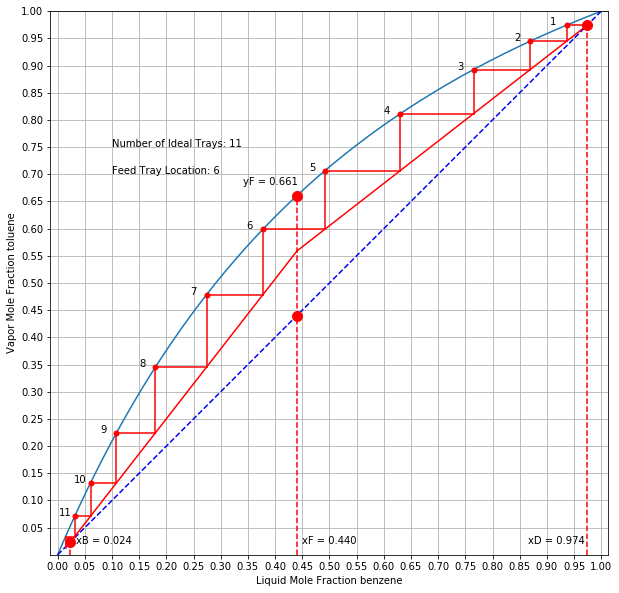

In [21]:
plt.figure(figsize=(10,10))
plt.plot([x(T) for T in T],[y(T) for T in T])
plt.plot([0,1],[0,1],'b--')
plt.axis('equal')
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(0.05,1.0,20))

plt.xlabel('Liquid Mole Fraction {:s}'.format(A))
plt.ylabel('Vapor Mole Fraction {:s}'.format(B))

plt.plot([xD,xD], [0,xD], 'r--')
plt.plot(xD,xD, 'ro', ms=10)
plt.text(xD-0.11, 0.02, 'xD = {:0.3f}'.format(float(xD)))

plt.plot([xF,xF,xF],[0,xF,yF],'r--')
plt.plot([xF,xF],[xF,yF],'ro',ms=10)
plt.text(xF+0.01,0.02,'xF = {:0.3f}'.format(float(xF)))
plt.text(xF-0.1,yF+0.02,'yF = {:0.3f}'.format(float(yF)));

plt.plot([xB,xB], [0,xB], 'r--')
plt.plot(xB,xB, 'ro', ms=10)
plt.text(xB+0.01, 0.02, 'xB = {:0.3f}'.format(float(xB)))

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

plt.plot([xD,xF],[xD,zF],'r-')
plt.plot([xB,xF],[xB,zF],'r-')

xP = xD
yP = xD

nTray = 0
located_feed = False
fTray = None

while xP > xB:
    nTray += 1

    xQ = xP
    yQ = yP

    Tdew = fsolve(lambda T:y(T) - yP, 400)
    xP = x(Tdew)
    plt.plot([xQ,xP], [yQ,yP], 'r') 
    
    if xP > xB:
        plt.plot(xP, yP, 'ro', ms=5)
        plt.text(xP-0.03, yP, nTray)

    ### BEGIN NEW CODE ###
    
    if located_feed is False and xP < xF:
        located_feed = True
        fTray = nTray
        plt.text(0.1,0.70,'Feed Tray Location: {:d}'.format(int(fTray)));
        
    ### END NEW CODE ###
    
    xQ = xP
    yP = min([xD - R_slope * (xD-xP),xB + ((S+1)/S)*(xP-xB)])
    plt.plot([xQ,xP],[yQ,yP],'r')

nTray -= 1

plt.text(0.1,0.75,'Number of Ideal Trays: {:d}'.format(int(nTray)));